In [329]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [330]:
path = "datasets/bitly_usagov/example.txt"

In [331]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [332]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [333]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [334]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [335]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [336]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [337]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [338]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [339]:
frame = pd.DataFrame(records)

In [340]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [341]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [342]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [343]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

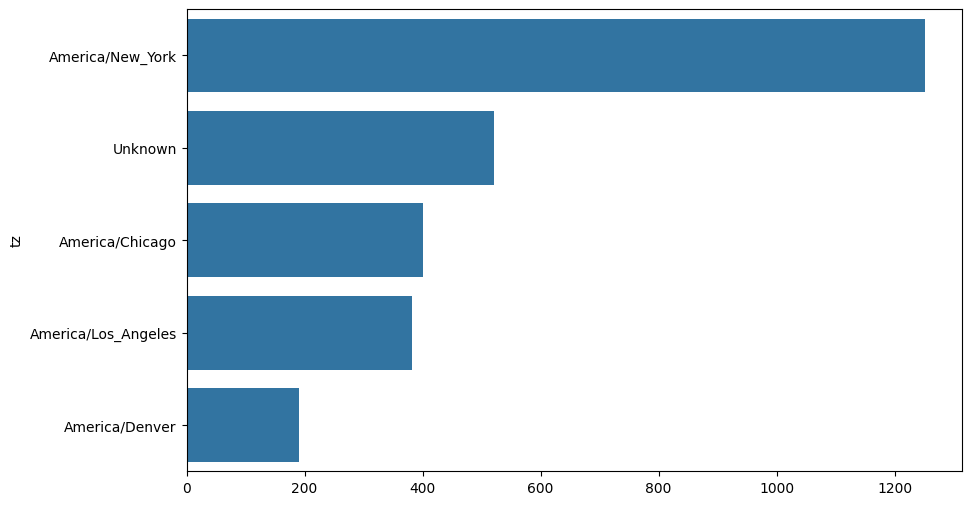

In [344]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [345]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [346]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [347]:
cframe = frame[frame["a"].notna()].copy()

In [348]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [349]:
by_tz_os = cframe.groupby(["tz", "os"])

In [350]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [351]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [352]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [353]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [354]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total', ylabel='tz'>

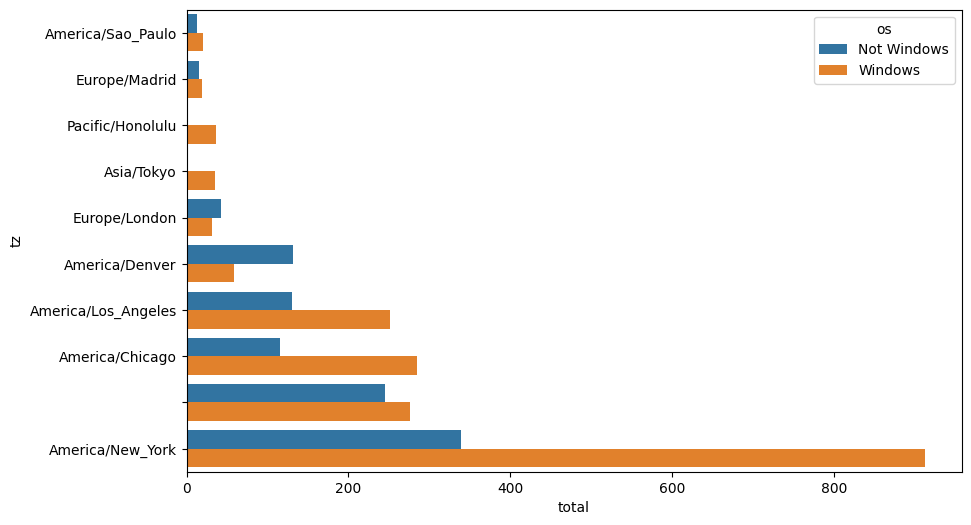

In [355]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [356]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

/tmp/ipykernel_7191/1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [357]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

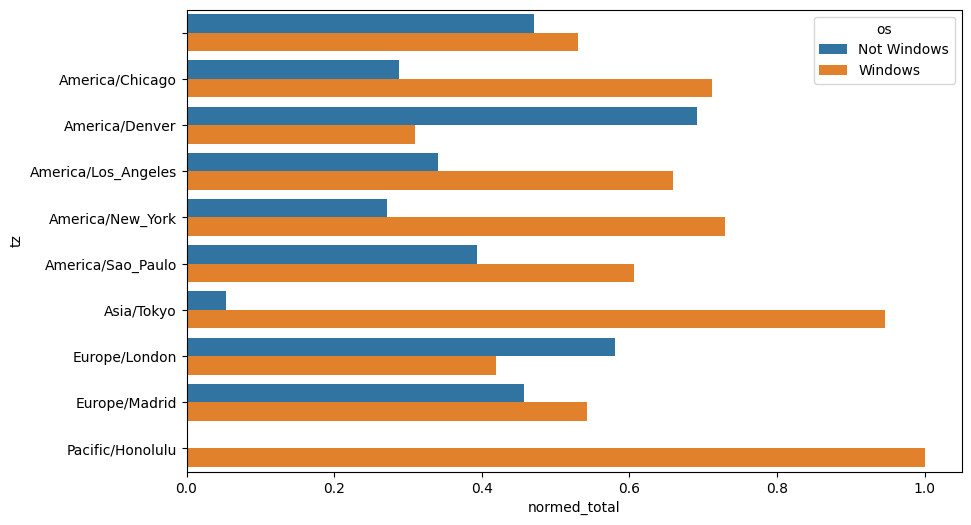

In [358]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [359]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

## Exercise

1. **Explore User Agents**:
   - Write a function to extract the browser information (the first token in the user agent string) from the "a" column in the DataFrame.
   - Count the occurrences of each unique browser in the dataset.
   - Visualize the distribution of browsers using a bar plot.

2. **Time Zone Analysis**:
   - Calculate the average time spent (in seconds) on each URL by users in different time zones.
   - Identify the time zone with the highest average time spent on URLs and the time zone with the lowest average time spent.
   - Visualize the distribution of time spent on URLs by time zone using a box plot.

<Axes: xlabel='a'>

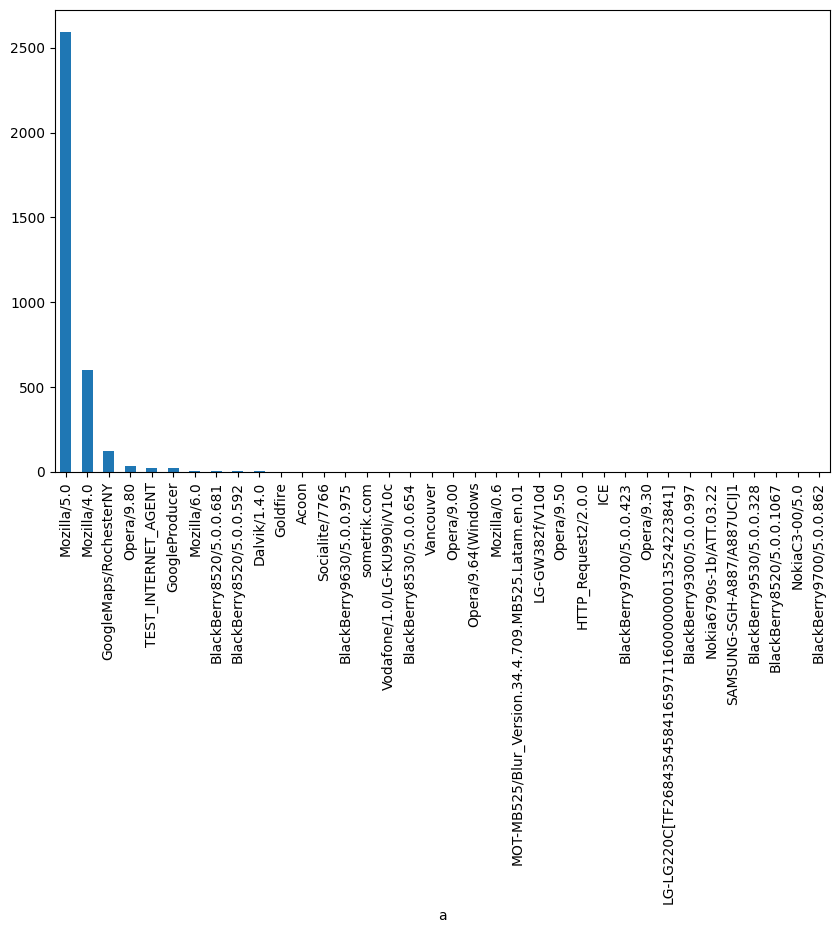

In [363]:
def extract_browser(user_agent):
    if isinstance(user_agent, str):
        return user_agent.split()[0]
    else:
        return None
browser_counts= frame['a'].apply(extract_browser).value_counts()

import matplotlib as plt

browser_counts[:].plot(kind= "bar")

In [372]:
average_time= frame.groupby['tz']['t'].mean()

average_time

import seaborn as sns
top_10_time_zones = frame["tz"].value_counts().head(10)


TypeError: 'method' object is not subscriptable

In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [ ]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

In [ ]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

In [ ]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [ ]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

In [ ]:
sorted_by_diff[::-1].head()

In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

In [ ]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

In [ ]:
!head -n 10 datasets/babynames/yob1880.txt

In [ ]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

In [ ]:
names1880.groupby("sex")["births"].sum()

In [ ]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names

In [ ]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

In [ ]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

In [ ]:
names

In [ ]:
names.groupby(["year", "sex"])["prop"].sum()

In [ ]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

In [ ]:
top1000 = top1000.reset_index(drop=True)

In [ ]:
top1000.head()

In [ ]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [ ]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [ ]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

In [ ]:
plt.figure()

In [ ]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [ ]:
df = boys[boys["year"] == 2010]
df

In [ ]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [ ]:
fig = plt.figure()

In [ ]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

In [ ]:
plt.close("all")

In [ ]:
fig = plt.figure()

In [ ]:
dny_ts.plot()

In [ ]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

In [ ]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

In [ ]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

In [ ]:
fig = plt.figure()

In [ ]:
table.plot(style={"M": "k-", "F": "k--"})

In [ ]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

In [ ]:
db[0].keys()
db[0]["nutrients"][0]
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

In [ ]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()
info.info()

In [ ]:
pd.value_counts(info["group"])[:10]

In [ ]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [ ]:
nutrients

In [ ]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [ ]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

In [ ]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

In [ ]:
fig = plt.figure()

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [ ]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

In [ ]:
max_foods.loc["Amino Acids"]["food"]

In [ ]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

In [ ]:
fec.iloc[123456]

In [ ]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

In [ ]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [ ]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

In [ ]:
(fec["contb_receipt_amt"] > 0).value_counts()

In [ ]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [ ]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [ ]:
fec["contbr_occupation"].value_counts()[:10]

In [ ]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [ ]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [ ]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

In [ ]:
plt.figure()

In [ ]:
over_2mm.plot(kind="barh")

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

In [ ]:
plt.figure()

In [ ]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

In [ ]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)